In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [12]:
def nlp_query(user_input):
    user_input = user_input.lower().strip()
    doc = nlp(user_input)

    keywords = [token.lemma_ for token in doc if not token.is_stop and token.pos_ in ['NOUN', 'VERB', 'ADJ']]
    
    if not keywords:
        return "🤔 I couldn’t understand the question."

    matches = []

    for i, row in df.iterrows():
        task_doc = nlp(row['task'].lower())
        task_keywords = [token.lemma_ for token in task_doc if not token.is_stop and token.pos_ in ['NOUN', 'VERB', 'ADJ']]
        
        if any(word in task_keywords for word in keywords):
            matches.append(row)

    if matches:
        return pd.DataFrame(matches)
    else:
        return "😓 No tasks match your question."


In [13]:
!pip install seaborn matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import random


In [15]:
import pandas as pd

data = {
    'task': [
        "Fix the login issue before the demo tomorrow",
        "Complete the final project documentation",
        "Update the sales report and share with the team",
        "Respond to all pending client emails",
        "Urgently prepare presentation slides for CEO meeting",
        "Schedule 1-on-1 meetings with the team",
        "Investigate the payment gateway error",
        "Send appreciation email to the design team",
        "Plan team outing next weekend",
        "Call vendor to negotiate rates for hardware purchase",
        "Conduct code review session with interns",
        "Deploy latest bug fix to production",
        "Test the new signup flow thoroughly",
        "Prepare marketing materials for the campaign launch",
        "Urgently resolve security vulnerabilities",
        "Research new analytics tools for dashboards",
        "Finalize travel plan for on-site training",
        "Discuss roadmap with the product team",
        "Book meeting room for the client demo",
        "Organize design sprint session",
        "Fix the issue causing downtime last night",
        "Submit your timesheet for this week",
        "Review PR #45 and merge if approved",
        "Follow up with HR regarding new hire onboarding",
        "Complete UI testing for checkout flow",
        "Publish blog post draft by Friday",
        "Send customer survey results to product team",
        "Update database schema before Monday",
        "Get feedback from beta testers",
        "Fix notification bug for Android users",
        "Plan Q4 strategy session with leadership",
        "Urgent: fix the API timeout issue",
        "Clean up unused assets in the repo",
        "Prepare backup before deploying migration",
        "Write handover doc for DevOps team",
        "Check server logs for recent crashes",
        "Refactor code for invoice generator",
        "Research voice assistant integration",
        "Urgent: resolve mobile UI glitch",
        "Plan product launch email sequence",
        "Fix broken image links on homepage",
        "Test dark mode toggle in all browsers",
        "Optimize large images for faster load time",
        "Organize knowledge-sharing session",
        "Update test cases for login module",
        "Reply to GitHub issues marked as ‘bug’",
        "Urgent: fix customer data syncing issue",
        "Create wireframes for new dashboard UI",
        "Push build to staging environment",
        "Improve accessibility on settings page",
        "Refine pricing page content",
        "Review competitive analysis document",
        "Fix user avatar upload bug",
        "Set up email alerts for error monitoring",
        "Prepare team for client pitch tomorrow",
        "Relax and take a break — it’s been a tough week",
        "Send welcome email to new users",
        "Double-check campaign emails before launch",
        "Schedule system downtime for maintenance",
        "Follow up with vendor on delivery status",
        "Log all open issues before weekend",
        "Urgently reset database indexes",
        "Share highlights of team achievements",
        "Fix date formatting bug on invoices",
        "Hold retrospective meeting after sprint",
        "Create test cases for forgot password flow",
        "Update readme file in the repo",
        "Re-enable push notifications",
        "Prepare budget estimate for next month",
        "Check compatibility with Safari browser",
        "Fix broken download link on reports page",
        "Confirm venue for workshop event",
        "Urgent: troubleshoot failed login attempts",
        "Test feedback widget on dashboard",
        "Update brand colors in style guide",
        "Fix redirect issue in logout flow",
        "Send birthday wishes to team members",
        "Post project update on Slack",
        "Refactor long functions in billing module",
        "Urgent: reply to angry customer email",
        "Test referral tracking in sandbox",
        "Plan weekend support rotation",
        "Back up client data weekly",
        "Fix grammar errors in welcome email",
        "Rearrange FAQs by most popular topics",
        "Add translations to user help pages",
        "Create script for feature walkthrough video",
        "Urgent: patch XSS vulnerability in comments",
        "Optimize scripts for faster load time",
        "Fix timezone bugs in calendar view",
        "Update expired SSL certificate",
        "Prepare summary of Q3 performance",
        "Fix search indexing on new articles",
        "Review suggestions from usability test",
        "Add lazy loading to media content",
        "Clean up broken internal links",
        "Help QA team with regression testing",
        "Fix mobile alignment on contact form",
        "Set reminder for daily team stand-up",
        "Urgent: investigate drop in user engagement",
        "Add support for passwordless login",
        "Set up cron job for nightly backup"
    ]
}

df = pd.DataFrame(data)
df.head()


,task
0,Fix the login issue before the demo tomorrow
1,Complete the final project documentation
2,Update the sales report and share with the team
3,Respond to all pending client emails
4,Urgently prepare presentation slides for CEO m...


In [16]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['task'].apply(get_sentiment)


In [17]:
def get_priority(task):
    task = task.lower()
    if "urgent" in task or "now" in task or "asap" in task:
        return "Urgent"
    elif "fix" in task or "issue" in task:
        return "High"
    elif "update" in task or "meeting" in task:
        return "Medium"
    else:
        return "Low"

df['priority'] = df['task'].apply(get_priority)


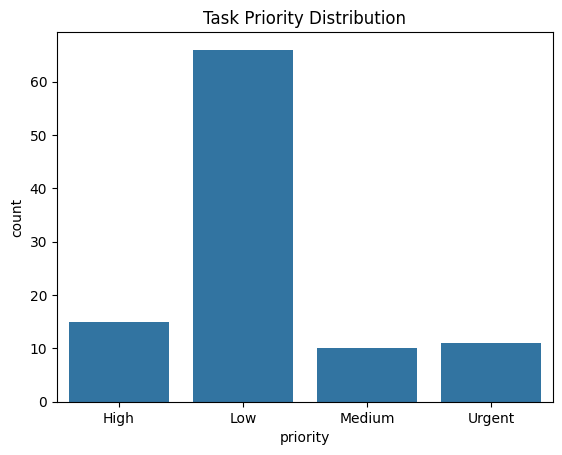

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='priority', data=df)
plt.title("Task Priority Distribution")
plt.show()


In [23]:
import random

df['status'] = [random.choice(['To Do', 'In Progress', 'Completed']) for _ in range(len(df))]


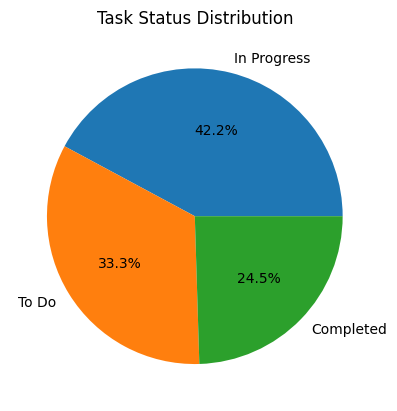

In [24]:
import matplotlib.pyplot as plt

status_counts = df['status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.title("Task Status Distribution")
plt.show()


In [26]:
def smart_query(question):
    question = question.lower().strip()
    
    if any(word in question for word in ["urgent", "critical", "asap", "immediate"]):
        return df[df['priority'] == 'Urgent']
    elif any(word in question for word in ["high", "important", "fix", "issue"]):
        return df[df['priority'] == 'High']
    elif any(word in question for word in ["medium", "moderate", "okay"]):
        return df[df['priority'] == 'Medium']
    elif any(word in question for word in ["low", "less important", "not urgent", "relax", "chill"]):
        return df[df['priority'] == 'Low']
    elif "negative" in question:
        return df[df['sentiment'] < 0]
    elif "positive" in question:
        return df[df['sentiment'] > 0]
    elif "how many" in question or "count" in question:
        return df['priority'].value_counts()
    elif "status" in question:
        return df['status'].value_counts()
    else:
        return "❓ Sorry, I didn’t understand your question."


In [27]:
smart_query("What are the less important task?")


,task,sentiment,priority,status
0,Fix the login issue before the demo tomorrow,0.000000,High,In Progress
11,Deploy latest bug fix to production,0.500000,High,Completed
20,Fix the issue causing downtime last night,0.000000,High,In Progress
29,Fix notification bug for Android users,0.000000,High,To Do
40,Fix broken image links on homepage,-0.400000,High,To Do
45,Reply to GitHub issues marked as ‘bug’,0.100000,High,To Do
52,Fix user avatar upload bug,0.000000,High,Completed
60,Log all open issues before weekend,0.000000,High,Completed
63,Fix date formatting bug on invoices,0.000000,High,In Progress
70,Fix broken download link on reports page,-0.400000,High,To Do


In [21]:
smart_query("What are the urgent tasks?")



,task,sentiment,priority
4,Urgently prepare presentation slides for CEO m...,0.0,Urgent
14,Urgently resolve security vulnerabilities,0.0,Urgent
31,Urgent: fix the API timeout issue,0.0,Urgent
38,Urgent: resolve mobile UI glitch,0.0,Urgent
43,Organize knowledge-sharing session,0.0,Urgent
46,Urgent: fix customer data syncing issue,0.0,Urgent
61,Urgently reset database indexes,0.0,Urgent
72,Urgent: troubleshoot failed login attempts,-0.5,Urgent
79,Urgent: reply to angry customer email,-0.5,Urgent
87,Urgent: patch XSS vulnerability in comments,0.0,Urgent


In [34]:
smart_query("Which tasks are positive?")


,task,sentiment,priority,status
1,Complete the final project documentation,0.050000,Low,To Do
11,Deploy latest bug fix to production,0.500000,High,Completed
12,Test the new signup flow thoroughly,0.136364,Low,Completed
15,Research new analytics tools for dashboards,0.136364,Low,In Progress
23,Follow up with HR regarding new hire onboarding,0.136364,Low,Completed
24,Complete UI testing for checkout flow,0.100000,Low,To Do
32,Clean up unused assets in the repo,0.366667,Low,To Do
42,Optimize large images for faster load time,0.214286,Low,In Progress
45,Reply to GitHub issues marked as ‘bug’,0.100000,High,To Do
47,Create wireframes for new dashboard UI,0.136364,Low,In Progress


In [35]:
smart_query("What are the less important tasks?")


,task,sentiment,priority,status
0,Fix the login issue before the demo tomorrow,0.000000,High,In Progress
11,Deploy latest bug fix to production,0.500000,High,Completed
20,Fix the issue causing downtime last night,0.000000,High,In Progress
29,Fix notification bug for Android users,0.000000,High,To Do
40,Fix broken image links on homepage,-0.400000,High,To Do
45,Reply to GitHub issues marked as ‘bug’,0.100000,High,To Do
52,Fix user avatar upload bug,0.000000,High,Completed
60,Log all open issues before weekend,0.000000,High,Completed
63,Fix date formatting bug on invoices,0.000000,High,In Progress
70,Fix broken download link on reports page,-0.400000,High,To Do


In [29]:
nlp_query("Which tasks are critical?")
nlp_query("Show me things I need to fix")
nlp_query("Any design updates pending?")
nlp_query("List all urgent or high priority tasks")
nlp_query("What do I need to do tomorrow?")


,task,sentiment,priority,status
0,Fix the login issue before the demo tomorrow,0.0,High,In Progress
54,Prepare team for client pitch tomorrow,0.0,Low,Completed


In [36]:
smart_query("How many tasks are in each priority level?")


priority
Low       66
High      15
Urgent    11
Medium    10
Name: count, dtype: int64

In [37]:
smart_query("Show the status distribution of all tasks")


status
In Progress    43
To Do          34
Completed      25
Name: count, dtype: int64

In [33]:
# 🔥 Demo of Asking Questions:

#**Q:** What are the urgent tasks?  
#**A:** (Model shows urgent tasks)

#**Q:** List all tasks that are less important.  
#**A:** (Model shows low priority tasks)

#**Q:** How many tasks are there by priority?  
#**A:** (Model shows counts)


